In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob 
import re

## Leer los datos del archivo

In [9]:
data= pd.read_csv('Sample.csv', encoding = 'unicode_escape')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13/06/2013,17/06/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11/10/2012,18/10/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11/10/2012,18/10/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Convertir las varibles de cada columna de str a int

In [10]:
data['Quantity '] = pd.to_numeric(data['Quantity']) #make int
data['Sales'] = pd.to_numeric(data['Sales'])
data['Discount'] = pd.to_numeric(data['Discount'])
data['Profit'] = pd.to_numeric(data['Profit'])

### Agregar una columna de precio unitario

In [11]:
data['price'] = data['Sales'] / data['Quantity']
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Quantity,price
0,1,CA-2013-152156,09/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2,130.9800
1,2,CA-2013-152156,09/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.9800
2,3,CA-2013-138688,13/06/2013,17/06/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2,7.3100
3,4,US-2012-108966,11/10/2012,18/10/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,5,191.5155
4,5,US-2012-108966,11/10/2012,18/10/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2,11.1840


### Agregar columnas especificas para el año y mes de compra

In [15]:
data['Año']= data['Order Date'].str[6:10]
data['Año'] = data['Año'].astype('int32')
data['Mes'] = data['Order Date'].str[3:5]
data['Mes'] = data['Mes'].astype('int32')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Quantity,price,Año,Mes
0,1,CA-2013-152156,09/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2,130.9800,2013,11
1,2,CA-2013-152156,09/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.9800,2013,11
2,3,CA-2013-138688,13/06/2013,17/06/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2,7.3100,2013,6
3,4,US-2012-108966,11/10/2012,18/10/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,5,191.5155,2012,10
4,5,US-2012-108966,11/10/2012,18/10/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2,11.1840,2012,10


## Cuál fue el mejor año en ventas?

In [16]:
best_year = data.groupby('Año').sum()
best_year

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Quantity,price,Mes
Año,,,,,,,,,
2011,9904015,113271247,484247.4981,7581,315.46,49543.9741,7581,124217.8735,15664
2012,10413696,111208247,470532.5090,7979,327.09,61618.6037,7979,125407.3468,16700
2013,12752367,140529941,608473.8300,9810,399.12,81726.9308,9810,158987.4589,20032
2014,16874937,186563217,733947.0232,12503,519.42,93507.5131,12503,200217.4939,25703


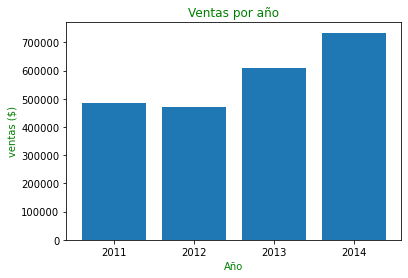

In [60]:
year_group = data.groupby('Año')
Año = [Año for Año, data in year_group]

plt.bar(Año, best_year['Sales'])
plt.xticks(Año)
plt.title('Ventas por año', color = 'g')
plt.xlabel('Año', color ='g')
plt.ylabel('ventas ($)', color = 'g')
plt.savefig('bar.png', dpi=300, bbox_inches='tight')
plt.show()

#### El mejor año en ventas fue 2014

## Cuál fue el mejor mes en ventas?

In [18]:
month_group = data.groupby('Mes').sum()


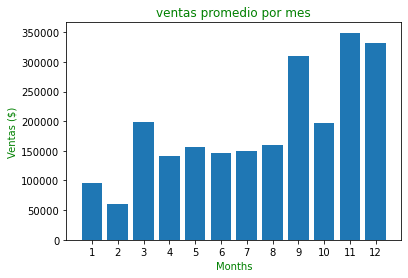

In [62]:
Months = range(1,13)
plt.bar(Months, month_group['Sales'])
plt.xticks(Months)
plt.title('ventas promedio por mes', color ='g')
plt.xlabel('Months', color ='g')
plt.ylabel('Ventas ($)', color ='g')
plt.savefig('best_month.png', dpi=300, bbox_inches='tight')
plt.show()

### El mes con más ventas fue Noviembre

## En que categoria se vendio más productos?

In [20]:

categoria= data.groupby('Category')
categoria.sum()




,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Quantity,price,Año,Mes
Category,,,,,,,,,,
Furniture,10693326,118196026,741999.7953,8028,368.89,18451.2728,8028,192701.5211,4268965,16823
Office Supplies,30010535,330772872,719047.0320,22906,947.80,122490.8008,22906,193769.5140,12128671,46879
Technology,9241154,102603754,836154.0330,6939,244.40,145454.9481,6939,222359.1380,3717517,14397


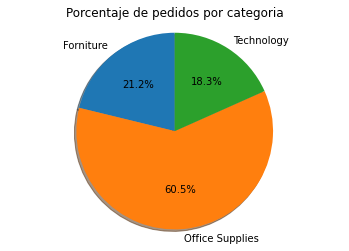

In [63]:

quantity_order1 = categoria.sum()['Quantity']

category= [category for category, data in categoria]

labels= 'Forniture','Office Supplies','Technology'
sizes = [8028,22906,6939]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Porcentaje de pedidos por categoria")
plt.savefig('quantity_ordered.png', dpi=300, bbox_inches='tight')
plt.show()

### La categoria en la que más compras se realizaron fue en articulos de oficina

# En que categoria se generaron más ventas?

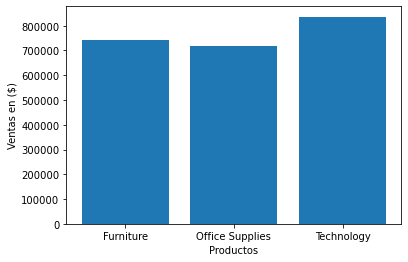

In [64]:
sales_category = categoria.sum()['Sales']

plt.bar(category, sales_category)
plt.xticks(category)
plt.ylabel('Ventas en ($)')
plt.xlabel('Productos')
plt.savefig('top_sales1.png', dpi=300, bbox_inches='tight')
plt.show()


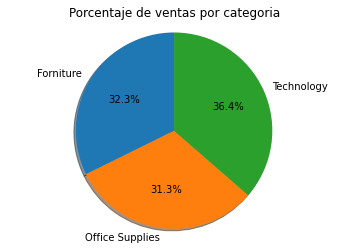

In [65]:
size1 = [741999.7953,719047.0320,836154.0330]

fig2, ax2 = plt.subplots()
ax2.pie(size1,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Porcentaje de ventas por categoria")
plt.savefig('top_sales2.png', dpi=300, bbox_inches='tight')
plt.show()

### La categoria que genero más capital fue tecnologia.

In [24]:
product_group = data.groupby('Product Name')
#product_group.sum()

products = [product for product, data in product_group]
products


['"While you Were Out" Message Book, One Form per Page',
 '#10 Gummed Flap White Envelopes, 100/Box',
 '#10 Self-Seal White Envelopes',
 '#10 White Business Envelopes,4 1/8 x 9 1/2',
 '#10- 4 1/8" x 9 1/2" Recycled Envelopes',
 '#10- 4 1/8" x 9 1/2" Security-Tint Envelopes',
 '#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes',
 '#6 3/4 Gummed Flap White Envelopes',
 '1.7 Cubic Foot Compact "Cube" Office Refrigerators',
 '1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2" X 11" Cards, 25 Env./Pack',
 '12 Colored Short Pencils',
 '12-1/2 Diameter Round Wall Clock',
 '14-7/8 x 11 Blue Bar Computer Printout Paper',
 '2300 Heavy-Duty Transfer File Systems by Perma',
 '24 Capacity Maxi Data Binder Racks, Pearl',
 '24-Hour Round Wall Clock',
 '3.6 Cubic Foot Counter Height Office Refrigerator',
 '36X48 HARDFLOOR CHAIRMAT',
 '3D Systems Cube Printer, 2nd Generation, Magenta',
 '3D Systems Cube Printer, 2nd Generation, White',
 '3M Hangers With Command Adhesive',
 '3M Office Air 

## En que ciudad se vendio más?


####  Agregar una columna para ciudad

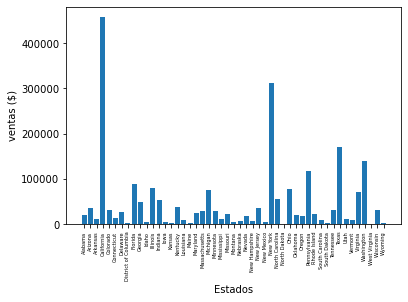

In [66]:
state = [state for state, data in data.groupby('State')]
results = data.groupby('State').sum()

plt.bar(state, results['Sales'])
plt.xticks(state, rotation='vertical', size=5)
plt.xlabel('Estados')
plt.ylabel('ventas ($)')
plt.savefig('cities.png', dpi=300, bbox_inches='tight')
plt.show()

#### La grafica muestra que el estado en que se registraron más ventas fue california, seguido de Nueva York y Texas

## Cuál fue la Sub-Categoria que vendio más?

In [34]:
data['SubCategory'] = data['Sub-Category']


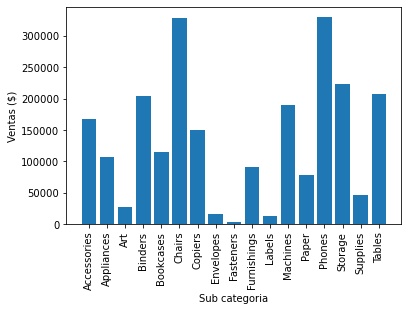

In [67]:
sub = [subcategory for  subcategory , data in data.groupby('SubCategory')]
sub_cate= data.groupby('SubCategory').sum()
sub_cate

plt.bar(sub, sub_cate['Sales'])
plt.xticks(sub, rotation='vertical', size=10)
plt.xlabel('Sub categoria')
plt.ylabel('Ventas ($)')
plt.savefig('products_sales.png', dpi=300, bbox_inches='tight')
plt.show()




### Sillas y telefonos celulares fueron las sub-categorias más vendidas.